### Package imports

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sys import argv
from collections import OrderedDict

/Users/luke/anaconda/envs/qiime190/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/Users/luke/anaconda/envs/qiime190/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Import data

In [2]:
path = 'results_rpkm.csv'

In [3]:
df = pd.read_csv(path, index_col=0)

In [4]:
genepos = np.arange(len(df.index))
df['gene_position'] = genepos

In [5]:
df_readable = df[['gene_position', 'Plk_rpkm_mean', 'Vnt_rpkm_mean', 'Vnt-vs-Plk_log2fc', 'Description']]

In [6]:
# top most enriched in Plk
df_readable.sort_values(by='Vnt-vs-Plk_log2fc', ascending=True).head(10)

,gene_position,Plk_rpkm_mean,Vnt_rpkm_mean,Vnt-vs-Plk_log2fc,Description
VF_number,,,,,
VF_A1087,3552,531.175848,1.756022,-8.728763,ABC transporter substrate-binding protein
VF_A1090,3555,89.540751,0.334746,-7.652550,ABC transporter permease protein
VF_A0487,2985,1450.252227,20.915594,-6.681156,outer membrane protein U paralog%2C OmpU2
VF_1611,1560,773.211006,18.003958,-5.916573,phosphate ABC transporter%2C permease protein ...
VF_A1057,3525,803.798728,25.547421,-5.715755,phosphatase
VF_1610,1559,6267.195558,201.797130,-5.684251,phosphate-binding protein
VF_1613,1562,1480.098580,56.082672,-5.478521,phosphate ABC transporter ATP-binding protein
VF_1612,1561,506.373777,16.053916,-5.276449,phosphate ABC transporter%2C permease protein ...
VF_A1089,3554,81.268535,5.876453,-4.590439,ABC transporter permease protein


In [7]:
# top most enriched in Plk
df_readable.sort_values(by='Vnt-vs-Plk_log2fc', ascending=False).head(10)

,gene_position,Plk_rpkm_mean,Vnt_rpkm_mean,Vnt-vs-Plk_log2fc,Description
VF_number,,,,,
VF_A0623,3109,3.867351,1874.936492,6.695796,hypothetical protein
VF_2603,2487,0.150680,158.316022,5.704440,trp operon leader peptide
VF_1082,1042,12.870603,1183.897230,5.579681,glutathione S-transferase
VF_A0701,3186,1.871989,358.119232,5.543864,transcriptional regulator
VF_A0920,3393,24.226062,3355.125961,5.506721,luciferase beta chain LuxB
VF_A0921,3394,31.430397,3419.309179,5.435746,luciferase alpha chain LuxA
VF_A1094,3559,7.612325,593.027935,5.020611,DNA-binding transcriptional regulator
VF_A0922,3395,32.452540,2124.853629,4.977870,acyl transferase
VF_A0474,2973,0.461120,75.730987,4.913213,TcpH protein


### Set what to plot

In [8]:
gene_dict = {
    'Phosphate': ['VF_A1087', 'VF_A1090', 'VF_1611', 'VF_A1057', 'VF_1610', 'VF_1613', 'VF_1612', 'VF_A1089'],
    'Motility': ['VF_1851', 'VF_2079', 'VF_1842', 'VF_2317', 'VF_1843', 'VF_1863', 'VF_1841'],
    'Lipid peroxidation': ['VF_1081', 'VF_1082', 'VF_1083', 'VF_A1049', 'VF_A1050'],
    'lux operon': ['VF_A0918', 'VF_A0919', 'VF_A0920', 'VF_A0924', 'VF_A0921', 'VF_A0922', 'VF_A0923', 'VF_A0924'],
    'LuxI-regulated': ['VF_A0985', 'VF_1161', 'VF_1162', 'VF_1725', 'VF_A0090', 'VF_A0622', 'VF_A1058'],
    'Host colonization': ['VF_0475', 'VF_A0487', 'VF_A0875', 'VF_A0874', 'VF_A0872', 'VF_A0870', 'VF_A0867', 'VF_A0866', 'VF_A0868', 'VF_A0869'],
    #'GGDEFdomain': ['VF_A0879', 'VF_A0343', 'VF_A0342', 'VF_A0476'],
    
    'TMAO reductase': ['VF_A0188', 'VF_A0189'],
    'Fat catabolism': ['VF_0533'],
    'Amino acids': ['VF_1585', 'VF_1586', 'VF_A0840'],
    'PTS sugars': ['VF_A0747', 'VF_A1189', 'VF_A0941', 'VF_A0942'],
    'Non-PTS sugars': ['VF_A0799']
    }

### Plot formatting

In [9]:
sns.set_context("talk")

In [10]:
cb = sns.color_palette("Accent", n_colors=8, desat=1)
#cb = [x.encode('ascii') for x in cb]
color_dict = {
    'Phosphate': 'blue',
    'Motility': 'light blue',
    'Lipid peroxidation': 'orange',
    'lux operon': 'red',
    'LuxI-regulated': 'pink',
    'Host colonization': 'teal',
    'TMAO reductase': 'bright blue',
    'Fat catabolism': 'kelly green',
    'Amino acids': 'goldenrod',
    'PTS sugars': 'coral',
    'Non-PTS sugars': 'carnation pink'
    }

In [11]:
# colors from http://xkcd.com/color/rgb/
# xy line colors
unity_color = sns.xkcd_rgb['grey']
xy_color_dict = {'Plk': sns.xkcd_rgb['black'],
                 'Swt': sns.xkcd_rgb['black'],
                 'Vnt': sns.xkcd_rgb['black']} 
# xy_color_dict = {'Plk': sns.xkcd_rgb['medium blue'],
#                  'Swt': sns.xkcd_rgb['light red'],
#                  'Vnt': sns.xkcd_rgb['medium green']} 

In [12]:
name_lookup = {
    'Plk': 'planktonic',
    'Swt': 'SWT',
    'Vnt': 'vented'
}

### Genome plot

In [37]:
def plot_log2fc_along_genome(log2fc, cond1, cond2, label, gene_set):
    fig = plt.plot(df['gene_position'], df[log2fc], color='k', linewidth=1)
    
    for pathway in gene_set:
        plt.scatter(df['gene_position'][gene_dict[pathway]], df[log2fc][gene_dict[pathway]], s=80, edgecolor='black', facecolor=sns.xkcd_rgb[color_dict[pathway]], label=pathway, zorder=10)
    
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=7, mode='expand', borderaxespad=0, fontsize=14, handletextpad=0.1)
    
    # plot up-reg
    #df_pos = df[df[log2fc] > 3]
    #plt.plot(df_pos['gene_position'], df_pos[log2fc], 'ko', markerfacecolor=xy_color_dict[cond1], markersize=6)
    plt.text(100, 7.5, 'Enriched in %s cells' % name_lookup[cond1], size=14, color=xy_color_dict[cond1], verticalalignment='center')
    # plot dn-reg
    #df_neg = df[df[log2fc] < -3]
    #plt.plot(df_neg['gene_position'], df_neg[log2fc], 'ko', markerfacecolor=xy_color_dict[cond2], markersize=6)
    plt.text(100, -7.5, 'Enriched in %s cells' % name_lookup[cond2], size=14, color=xy_color_dict[cond2], verticalalignment='center')
    
    # axis labels, limits and ticks
    if label is True:
        plt.xlabel('Position along Vibrio fischeri ES114 genome (gene 1 to 3693)')
    else:
        pass
    plt.ylabel('%s / %s, log2(fc)' % (cond1, cond2))
    plt.xlim([-100, len(df.index)+100])
    plt.ylim([-10, 10])
    plt.yticks([-9, -6, -3, 0, 3, 6, 9])
    plt.xlabel('Position along Vibrio fischeri ES114 genome (gene 1 to 3693)')

    #plt.savefig('genome_%s.pdf' % log2fc)

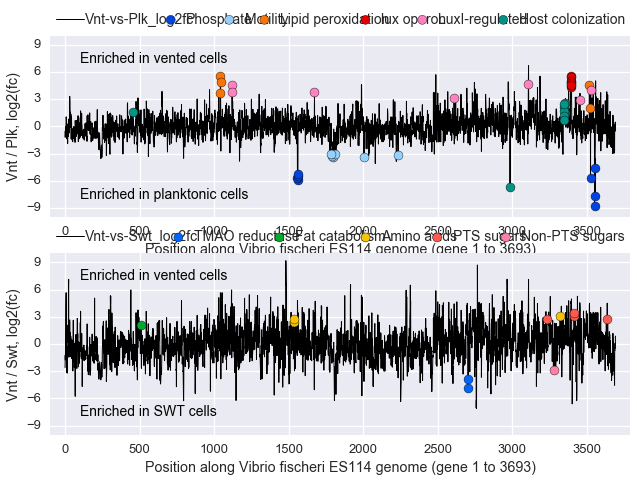

In [38]:
plt.subplot(2,1,1)
plot_log2fc_along_genome('Vnt-vs-Plk_log2fc', 'Vnt', 'Plk', False, ['Phosphate', 'Motility', 'Lipid peroxidation', 'lux operon', 'LuxI-regulated', 'Host colonization'])
#plt.subplot(3,1,2)
#plot_log2fc_along_genome('Plk-vs-Swt_log2fc', 'Plk', 'Swt')
plt.subplot(2,1,2)
plot_log2fc_along_genome('Vnt-vs-Swt_log2fc', 'Vnt', 'Swt', True, ['TMAO reductase', 'Fat catabolism', 'Amino acids', 'PTS sugars', 'Non-PTS sugars'])
plt.savefig('genome_three_comparisons.pdf')

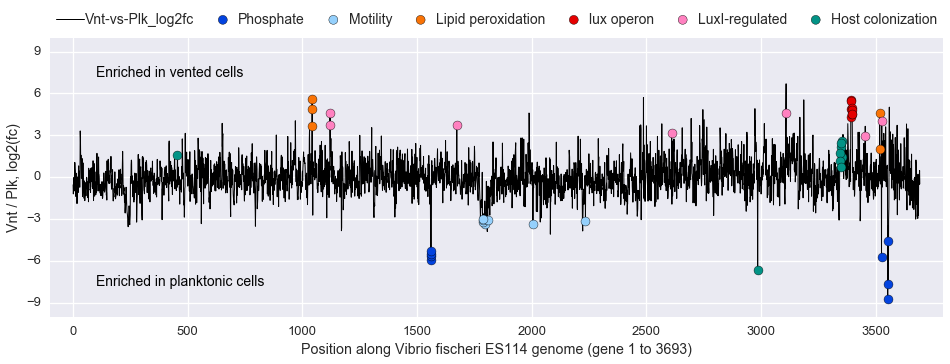

In [39]:
fig = plt.figure(figsize=(16,5))
plot_log2fc_along_genome('Vnt-vs-Plk_log2fc', 'Vnt', 'Plk', False, ['Phosphate', 'Motility', 'Lipid peroxidation', 'lux operon', 'LuxI-regulated', 'Host colonization'])
plt.savefig('genome_vnt_plk.pdf')

In [20]:
df_readable['gene_position'].min(), df_readable['gene_position'].max()

(0, 3692)

In [24]:
df_readable

,gene_position,Plk_rpkm_mean,Vnt_rpkm_mean,Vnt-vs-Plk_log2fc,Description
VF_number,,,,,
VF_0001,0,17.107461,15.187089,-0.545321,flavodoxin
VF_0002,1,111.573910,72.788515,-1.198416,tRNA modification GTPase TrmE
VF_0003,2,215.450290,221.600387,-0.842291,inner membrane protein translocase component YidC
VF_0004,3,95.838101,178.346914,-0.031098,ribonuclease P
VF_0005,4,5050.071196,3524.785994,-0.993482,50S ribosomal protein L34
VF_0006,5,98.510205,101.928435,-0.679938,cystine transport ATP-binding protein
VF_0007,6,54.114717,118.542618,0.351926,cystine transport system permease
VF_0008,7,503.961956,1868.462463,1.059565,cystine-binding protein
VF_0009,8,27.955257,97.887565,1.031507,chromosome replication initiator DnaA
